In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wd
from matplotlib.lines import Line2D

def interact_plot(pos, ax, min, max, step, h, int, colors, legend_elements):
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-5, 5)
    ax.set_xlabel('x (AU)')
    ax.set_ylabel('y (AU)')
    ax.set_zlabel('z (AU)')
    
    ax.legend(handles=legend_elements, loc='upper left')
    
    c=0
    for i in range(0, len(pos), 3):
        x, y, z = pos[i], pos[i+1], pos[i+2]
        ax.scatter(x[0], y[0], z[0], color=colors[c])
        c+=1

    slider=wd.IntSlider(
        value=0, #intial image index
        min=min,
        max=max, #video shouldn't play more than time limit
    )
    play_button=wd.Play(
        value=0, #intial image index
        min=min,
        max=max, #video shouldn't play more than time limit
        step=step,
        interval=int, #referesh interval in ms
        description="Press play",
    )

    wd.jslink((play_button,"value"),(slider,"value"))

    def slider_update(change):
        #stukje code dat je nodig hebt indien je slechts 1 scatter punt wil zien:
        ax.cla()
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5) 
        ax.set_zlim(-5, 5)
        ax.set_xlabel('x (AU)')
        ax.set_ylabel('y (AU)')
        ax.set_zlabel('z (AU)')
        ax.legend(handles=legend_elements, loc='upper left')
        
        c=0
        for i in range(0, len(pos), 3):
            x, y, z = pos[i], pos[i+1], pos[i+2]
            ax.scatter(x[change.new], y[change.new], z[change.new], color=colors[c])
            c+=1
        plt.suptitle('Time: {:.4f} (3e9s)'.format(slider.value*h))
        
    slider.observe(slider_update, "value")

    out=wd.Output()
    app=wd.VBox([wd.HBox([play_button,slider]),out])
    display(app)


(6, 99999)


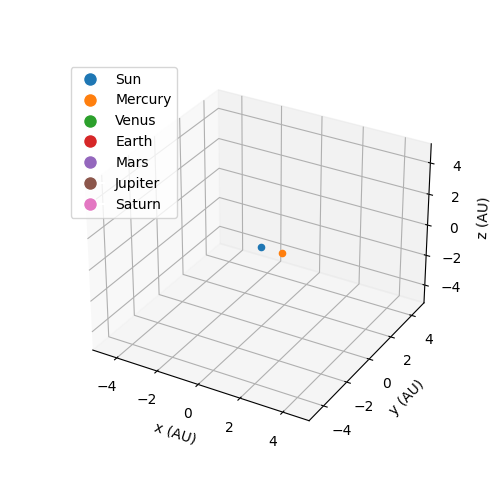

In [7]:
pos = np.loadtxt('Verlet.txt', unpack=True)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

min = 0
step = 2
int = 1
h= 10**(-5)
max = len(pos[0]-1)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Sun',
                          markerfacecolor='C0', markersize=10), Line2D([0], [0], marker='o', color='w', label='Mercury',
                          markerfacecolor='C1', markersize=10), Line2D([0], [0], marker='o', color='w', label='Venus',
                          markerfacecolor='C2', markersize=10), Line2D([0], [0], marker='o', color='w', label='Earth',
                          markerfacecolor='C3', markersize=10),  Line2D([0], [0], marker='o', color='w', label='Mars',
                          markerfacecolor='C4', markersize=10),  Line2D([0], [0], marker='o', color='w', label='Jupiter',
                          markerfacecolor='C5', markersize=10), Line2D([0], [0], marker='o', color='w', label='Saturn',
                          markerfacecolor='C6', markersize=10)]

print(pos.shape)

interact_plot(pos, ax, min, max, step, h, int, colors, legend_elements)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 99999 and the array at index 4 has size 100003

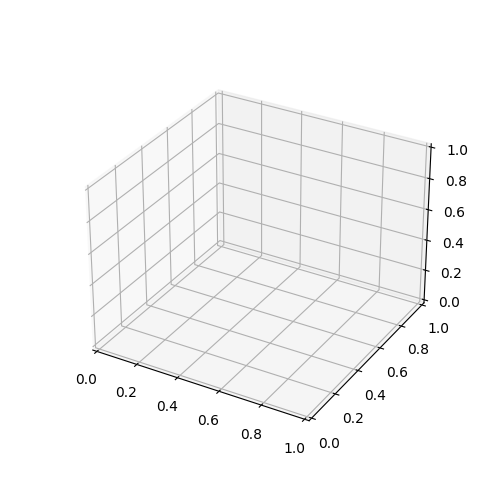

In [2]:
"""
pos_RK = np.loadtxt('RK4N.txt', unpack=True)
pos_V = np.loadtxt('verlet.txt', unpack=True)
pos_FR = np.loadtxt('FR.txt', unpack=True)
pos_AB = np.loadtxt('Adams-Bashforth.txt', unpack=True)
pos_AM = np.loadtxt('Adams-Moulton.txt', unpack=True)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']


pos = np.concatenate((pos_RK, pos_V[3:], pos_FR[3:], pos_AB[3:], pos_AM[3:]), axis=0)

min = 0
step = 2
int = 1
h= 10**(-5)
max = len(pos[0]-1)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Runge-kutta',
                          markerfacecolor='C1', markersize=10), Line2D([0], [0], marker='o', color='w', label='Verlet',
                          markerfacecolor='C2', markersize=10), Line2D([0], [0], marker='o', color='w', label='Forest-Ruth',
                          markerfacecolor='C3', markersize=10), Line2D([0], [0], marker='o', color='w', label='Adams-Bashforth',
                          markerfacecolor='C4', markersize=10), Line2D([0], [0], marker='o', color='w', label='Adams-Moulton',
                          markerfacecolor='C5', markersize=10)]

print(pos.shape)

interact_plot(pos, ax, min, max, step, h, int, colors, legend_elements)
    
    """

